In [13]:
import numpy as np 
import matplotlib.pyplot as plt


def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


inputs = np.array([[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1],
                   [1,1,1,0,0,1,1,1,1,1,0,0,1,1,1],
                   [1,1,1,0,0,1,1,1,1,0,0,1,1,1,1]])
expected_output = np.array([[1,0,0],[0,1,0],[0,0,1]])

epochs = 10000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 15,15,3


hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))



for i in range(epochs):
    
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    



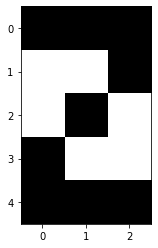

[[0.00618329 0.97394245 0.02676642]]

[[0.93301666 0.99221135 0.91556172]
 [0.995518   0.93770321 0.94807749]
 [0.98305814 0.98394129 0.98895176]
 [0.99858434 0.98997952 0.99720278]
 [0.99446957 0.94431789 0.98346839]]


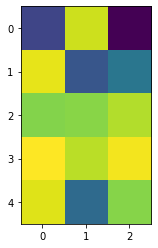

In [34]:
inputs = np.array([[1,1,1,0,0,1,0,1,0,1,0,0,1,1,1]])
plt.imshow(np.resize(inputs, (5, 3)), cmap='Greys')
plt.show()

hidden_layer_activation = np.dot(inputs,hidden_weights)
hidden_layer_activation += hidden_bias
hidden_layer_output = sigmoid(hidden_layer_activation)

output_layer_activation = np.dot(hidden_layer_output,output_weights)
output_layer_activation += output_bias
predicted_output = sigmoid(output_layer_activation)

print(predicted_output)
print()

hmap = np.resize(hidden_layer_output, (5, 3))
print(hmap)
plt.imshow(hmap)
plt.show()